## **Implemention of The Decision Tree**

---

### **Titanic Dataset**

Using Titanic dataset from Kaggle to predict survive or dead.

In [72]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns 

df = pd.read_csv("Dataset/titanic.csv")

df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [73]:
df.Sex = np.where(df["Sex"] == "male", 1, 0)
drop_elements = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked']
df = df.drop(drop_elements, axis = 1)
df = df[df['Age'].notna()]
df = df[df['Age'] != 'NaN']
df.loc[ df['Fare'] <= 7.91, 'Fare'] = 0
df.loc[(df['Fare'] > 7.91) & (df['Fare'] <= 14.454), 'Fare'] = 1
df.loc[(df['Fare'] > 14.454) & (df['Fare'] <= 31), 'Fare']   = 2
df.loc[ df['Fare'] > 31, 'Fare'] = 3

df['Fare'] = df['Fare'].astype(int)
df['Age'] = df['Age'].astype(int)
df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22,1,0,0
1,1,1,0,38,1,0,3
2,1,3,0,26,0,0,1


In [74]:
y = df['Survived']
X = df.drop(['Survived'], axis=1).values 

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 42)

In [76]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

|--- Sex <= 0.50
|   |--- Pclass <= 2.50
|   |   |--- Age <= 3.00
|   |   |   |--- class: 0
|   |   |--- Age >  3.00
|   |   |   |--- class: 1
|   |--- Pclass >  2.50
|   |   |--- Age <= 27.50
|   |   |   |--- class: 1
|   |   |--- Age >  27.50
|   |   |   |--- class: 0
|--- Sex >  0.50
|   |--- Age <= 3.50
|   |   |--- SibSp <= 3.00
|   |   |   |--- class: 1
|   |   |--- SibSp >  3.00
|   |   |   |--- class: 0
|   |--- Age >  3.50
|   |   |--- Pclass <= 1.50
|   |   |   |--- class: 0
|   |   |--- Pclass >  1.50
|   |   |   |--- class: 0
 



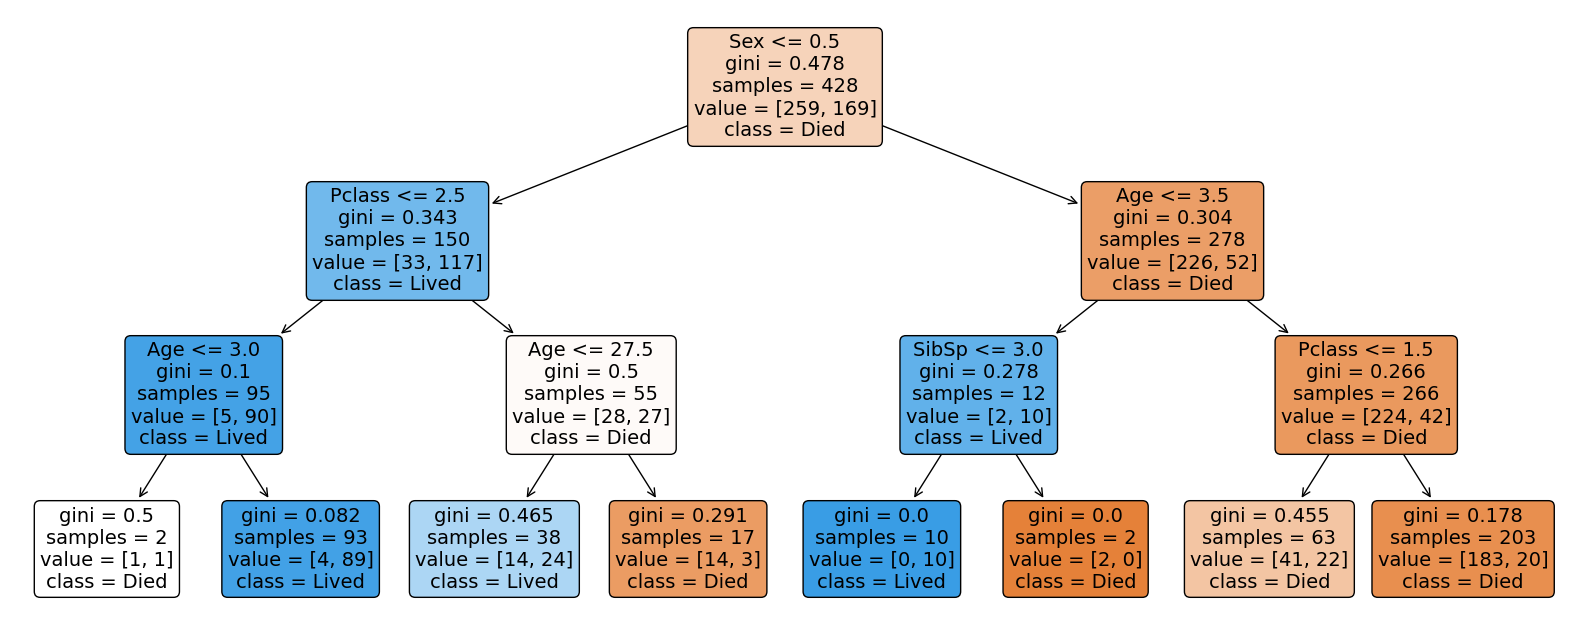

In [77]:
from sklearn.tree import plot_tree
from sklearn.tree import export_text

tree_rules = export_text(decision_tree,
                         feature_names = ["Pclass", "Sex","Age","SibSp","Parch","Fare"])
print(tree_rules, "\n")


plt.figure(figsize=(20, 8))
a = plot_tree(decision_tree,
                   feature_names = ["Pclass", "Sex","Age","SibSp","Parch","Fare"],
                   class_names = ["Died", "Lived"],
                   rounded = True,
                   filled = True, 
                   fontsize=14)
plt.show()

In [80]:
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree

85.05